## Navigation Project

![](https://user-images.githubusercontent.com/10624937/42135619-d90f2f28-7d12-11e8-8823-82b970a54d7e.gif)

- More info about the purpose of the project can be read here : [Udacity Project link](https://github.com/udacity/deep-reinforcement-learning/tree/master/p1_navigation)


## Prerequisites

- Create a python env as described here: https://github.com/udacity/deep-reinforcement-learning/tree/master/python

- Download the project structure here : [github](https://github.com/antoniopenta/deep_reinforcement_learning/tree/master/drl_navigation) 

- You need to download the unity env Banana at the following link (Mac) and save it (unzipped) in the env folder of the main project:  https://s3-us-west-1.amazonaws.com/udacity-drlnd/P1/Banana/VisualBanana.app.zip
 


## Project Structure

- The project has these foldes:
    - **data**: it contains data that are created during the execution
    - **framework**: it contain the code for the agents and the network for learning the Q function
    - **env**: where the unity env is store
    - **model**: where the checkpoint for the network is saved
    - **jupyter**: where the notebook with the explanation is store
    
     

## Scripts to Run 

- There are two main scripts in the main foler:
    - main_script_dq_test.py, which is used to see the agent in action loading the weights of the network that have been learned during the train
    - main_script_dq_train.py, which is used to train the agent
  
    
    

## Algorithm Explanation

- The agent implement the DeepQ-Learning approach with a Reply Buffer mechanism.
- The code is similar to the one provided by the exercise.



In [6]:
#HyperParemeter  for the agent:

BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 64         # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR = 5e-4               # learning rate 
UPDATE_EVERY = 4        # how often to update the network



In [7]:
#HyperParemeter  for the dqlearning algorithm 
# n_episodes (int): maximum number of training episodes
# max_t (int): maximum number of timesteps per episode
# eps_start (float): starting value of epsilon, for epsilon-greedy action selection
# eps_end (float): minimum value of epsilon
# eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
# max_score (float): that target score that we would like to reach, the benchmark is 15 in 1700 episode

n_episodes = 2000
max_t = 1000
eps_start = 1.0
eps_end = 0.001
eps_decay = 0.995
max_score = 15

- I have target a max score of 15 within 2000 episodes as suggested by the picture in the benchmark explantion

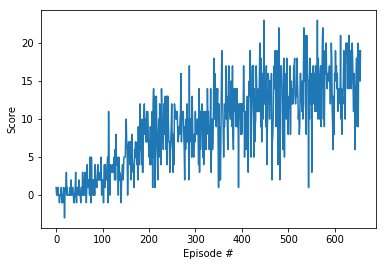

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#i load only the first run scores, 
path_scores = '../data/scores_1.txt'
with open(path_scores) as f:
    array_scores = np.array([float(item) for item in f.readlines()])
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(array_scores)), array_scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

- For 3 runs, I have observed the following distribution of actions, and the related increment score, which is the incremenet/descrement of the average score respect to thre previou session

| run | episode_num | avg_eps     | average_score | move forward | move backward | turn left | turn right | increment score |
|-----|-------------|-------------|---------------|--------------|---------------|-----------|------------|-----------------|
| 1   | 100         | 0.608814509 | 1.04          | 0.38         | 0.28          | 0.15      | 0.19       |                 |
| 1   | 200         | 0.368801831 | 4.55          | 0.39         | 0.15          | 0.25      | 0.21       | 3.375           |
| 1   | 300         | 0.223409246 | 8.13          | 0.43         | 0.06          | 0.25      | 0.26       | 0.786813187     |
| 1   | 400         | 0.135334717 | 11.18         | 0.06         | 0.04          | **0.44**      | **0.46**       | 0.375153752     |
| 1   | 500         | 0.08198177  | 13.64         | **0.54**         | 0.02          | 0.25      | 0.19       | 0.220035778     |
| 1   | 600         | 0.049662133 | 14.27         | **0.7**          | 0.01          | 0.17      | 0.12       | 0.046187683     |
| 1   | 700         | 0.030083852 | 14.56         | **0.68**         | 0.06          | 0.09      | 0.17       | 0.020322355     |
|     |             |             |               |              |               |           |            |                 |
| 2   | 100         | 0.608814509 | 0.91          | 0.23         | 0.24          | 0.25      | 0.28       |                 |
| 2   | 200         | 0.368801831 | 4.43          | 0.56         | 0.13          | 0.17      | 0.14       | 3.868131868     |
| 2   | 300         | 0.223409246 | 8.1           | 0.38         | 0.05          | 0.43      | 0.14       | 0.828442438     |
| 2   | 400         | 0.135334717 | 10.3          | 0.44         | 0.02          | **0.29**      | **0.25**       | 0.271604938     |
| 2   | 500         | 0.08198177  | 12.84         | **0.74**         | 0.02          | 0.13      | 0.11       | 0.246601942     |
| 2   | 600         | 0.049662133 | 14.14         | **0.63**        | 0             | 0.05      | 0.32       | 0.101246106     |
| 2   | 700         | 0.030083852 | 15.11         | **0.83**         | 0             | 0.06      | 0.11       | 0.068599717     |
|     |             |             |               |              |               |           |            |                 |
| 3   | 100         | 0.608814509 | 1.04          | 0.38         | 0.28          | 0.15      | 0.19       |                 |
| 3   | 200         | 0.368801831 | 4.55          | 0.39         | 0.15          | 0.25      | 0.21       | 3.375           |
| 3   | 300         | 0.223409246 | 8.13          | 0.43         | 0.06          | 0.25      | 0.26       | 0.786813187     |
| 3   | 400         | 0.135334717 | 11.18         | 0.06         | 0.04          | **0.44**      | **0.46**       | 0.375153752     |
| 3   | 500         | 0.08198177  | 13.64         | **0.54**         | 0.02          | 0.25      | 0.19       | 0.220035778     |
| 3   | 600         | 0.049662133 | 14.27         | **0.7**          | 0.01          | 0.17      | 0.12       | 0.046187683     |
| 3   | 700         | 0.030083852 | 14.56         | **0.68**         | 0.06          | 0.09      | 0.17       | 0.020322355     |

- From the data above, the network after the exploration, it started to have two particolar phenomena:
    - **Oscillation** between left and right actions
    - **Predominance** of moving forward action
- It seems that the network has some kind of saturation

- So I decided to add **dropout**  to the network to avoid any saturation phenomena

## Future works:
- Change the [Huber-Loss](https://en.wikipedia.org/wiki/Huber_loss) function  as described [in the official Pythorch tutorial](https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html)
- Add the [Dueling DQN](https://arxiv.org/abs/1511.06581) as described in the lesson, to help to sepate the importance of the state from the value of the q functions, and see if this helps to reduce the phenomena described above.